In [149]:
import pandas as pd

file_path = 'D:\\Pós DS\\prep\\OPT_DATA_DETALHE.csv'

# Ler o arquivo CSV
df = pd.read_csv(file_path, delimiter=';', encoding='utf-8-sig')
df.head()

,prod-descr,prod-marca,prod-detalhe,prod-fps,toque seco,todos os tipos de pele,resistente à água,rápida absorção,textura leve,ação antioxidante,...,oil control,pele oleosa,linhas de expressão,previne o envelhecimento,alta cobertura,previne rugas,uso diário,dermatologicamente testado,textura ultraleve,water gel
0,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,Protetor solar para peles oleosas. Ada Tina No...,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,Protetor solar facial com cor para todos os ti...,50,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Adcos Fotoproteção Diária Aqua Fluid FPS50 T...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Adcos Fotoproteção Diária Stick FPS80 Ivory ...,Adcos,Protetor solar facial com cor em bastão. Adcos...,80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
X = df.drop(['prod-descr', 'prod-detalhe','prod-marca','prod-fps'], axis=1)
X.head()

,toque seco,todos os tipos de pele,resistente à água,rápida absorção,textura leve,ação antioxidante,controle de oleosidade,possui textura,radicais livres,ácido hialurônico,...,oil control,pele oleosa,linhas de expressão,previne o envelhecimento,alta cobertura,previne rugas,uso diário,dermatologicamente testado,textura ultraleve,water gel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
import re
import unicodedata

# Função para normalizar os nomes das colunas (remover acentos e cedilha, substituir por caracteres sem acentuação)
def normalize_column_name(col_name):
    # Remover acentuação
    nfkd_form = unicodedata.normalize('NFKD', col_name)
    no_accent = "".join([c for c in nfkd_form if not unicodedata.combining(c)])
    # Substituir caracteres especiais por underscore e remover espaços
    return re.sub(r'[^A-Za-z0-9_]+', '_', no_accent)

X.columns = [normalize_column_name(col) for col in X.columns]
X.head()

,toque_seco,todos_os_tipos_de_pele,resistente_a_agua,rapida_absorcao,textura_leve,acao_antioxidante,controle_de_oleosidade,possui_textura,radicais_livres,acido_hialuronico,...,oil_control,pele_oleosa,linhas_de_expressao,previne_o_envelhecimento,alta_cobertura,previne_rugas,uso_diario,dermatologicamente_testado,textura_ultraleve,water_gel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
#X['prod_marca'], marcas = pd.factorize(X['prod_marca'])
#X.head()

99


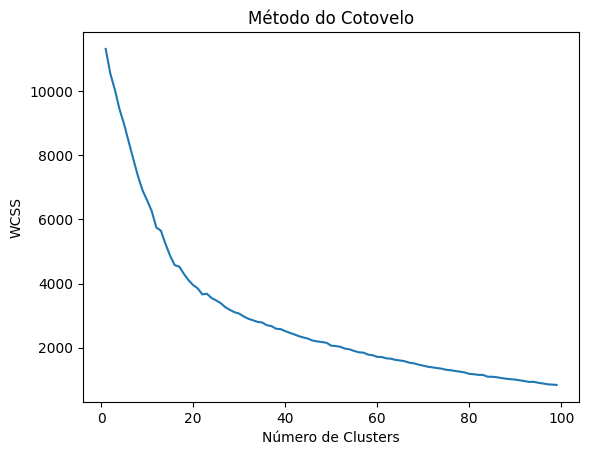

In [152]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método do cotovelo para determinar o número de clusters ideal
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_
print(kmeans.n_clusters)
#print(kmeans.labels_)
labels = kmeans.labels_

# Plotar o gráfico do cotovelo
plt.plot(range(1, 100), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # WCSS é a soma das distâncias quadradas dentro dos clusters
plt.show()



In [153]:
# Aplicar K-Means com o número ideal de clusters (digamos K=3)
kmeans = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao dataset original
df['Cluster'] = clusters
df.head()

,prod-descr,prod-marca,prod-detalhe,prod-fps,toque seco,todos os tipos de pele,resistente à água,rápida absorção,textura leve,ação antioxidante,...,pele oleosa,linhas de expressão,previne o envelhecimento,alta cobertura,previne rugas,uso diário,dermatologicamente testado,textura ultraleve,water gel,Cluster
0,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,Protetor solar para peles oleosas. Ada Tina No...,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
2,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,Protetor solar facial com cor para todos os ti...,50,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,16
3,Adcos Fotoproteção Diária Aqua Fluid FPS50 T...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
4,Adcos Fotoproteção Diária Stick FPS80 Ivory ...,Adcos,Protetor solar facial com cor em bastão. Adcos...,80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


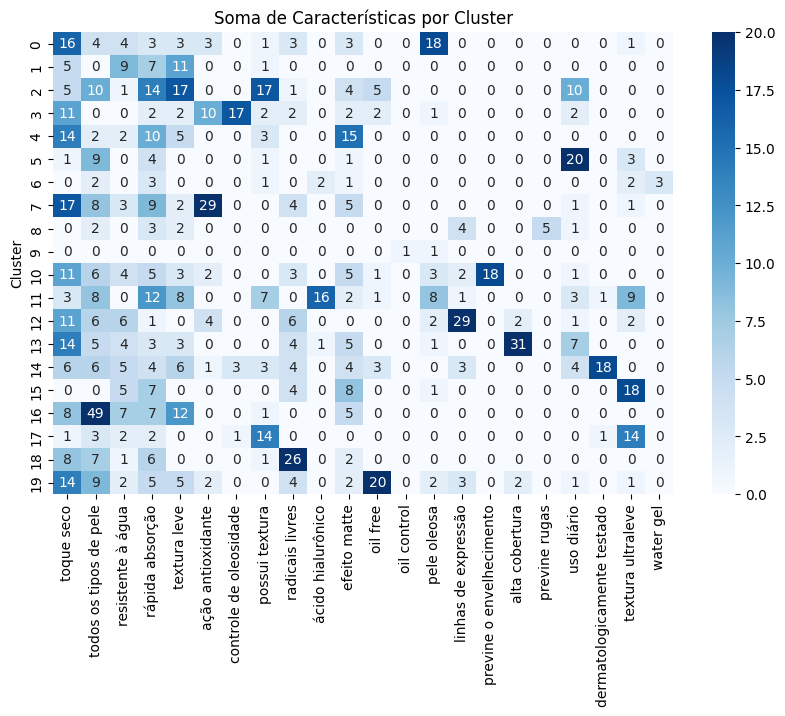

In [154]:
import seaborn as sns

# Remover colunas de descrição, detalhes e marca (mas manter 'prod-fps' separadamente)
df_c = df.drop(['prod-descr', 'prod-detalhe', 'prod-marca', 'prod-fps'], axis=1)

# Agrupar os dados por cluster e somar as características restantes
cluster_characteristics_sum = df_c.groupby('Cluster').sum()

# Visualização com heatmap (mapa de calor) para ver as características de cada cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_characteristics_sum, annot=True, cmap="Blues", vmin=0, vmax=20)
plt.title('Soma de Características por Cluster')
plt.show()

In [155]:
cluster_12_df = df[df['Cluster'] == 12]
cluster_12_df.loc[:, 'prod-marca'] = cluster_12_df['prod-marca'].str.strip().str.replace(' ', '').str.lower()
print(len(cluster_12_df))
cluster_12_df.head()

29


,prod-descr,prod-marca,prod-detalhe,prod-fps,toque seco,todos os tipos de pele,resistente à água,rápida absorção,textura leve,ação antioxidante,...,pele oleosa,linhas de expressão,previne o envelhecimento,alta cobertura,previne rugas,uso diário,dermatologicamente testado,textura ultraleve,water gel,Cluster
32,Protetor Solar Facial Bioderma Photoderm Cover...,bioderma,Photoderm Cover Touch FPS 50+ é a 1ª² proteção...,50,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,12
34,Protetor Solar Facial Bioderma Photoderm Cover...,bioderma,Photoderm Cover Touch FPS 50+ é a 1ª² proteção...,50,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,12
37,Bioderma Photoderm Cover Touch FPS 50+ 2.0 -...,bioderma,Protetor solar facial com cor e acabamento mat...,50,0,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,12
38,Bioderma Photoderm Cover Touch Mineral FPS50...,bioderma,Protetor solar facial com cor e acabamento mat...,50,0,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,12
44,Protetor Solar Facial Bioré Perfect Milk 50 FP...,bioré,Novo Bioré UV Perfect Milk oferece alta proteç...,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12


In [156]:
produtos_por_marca_df = cluster_12_df.groupby('prod-marca')['prod-descr'].count().reset_index(name='qtd_produtos')
produtos_por_marca_df.head(20)

,prod-marca,qtd_produtos
0,bdfnivea,1
1,beiersdorf,1
2,bioderma,4
3,bioré,1
4,cicatricure,1
5,divcompharma,2
6,hyperabr,1
7,johnson&johnson,1
8,l'oréaldcabr,1
9,l'oréalparis,5


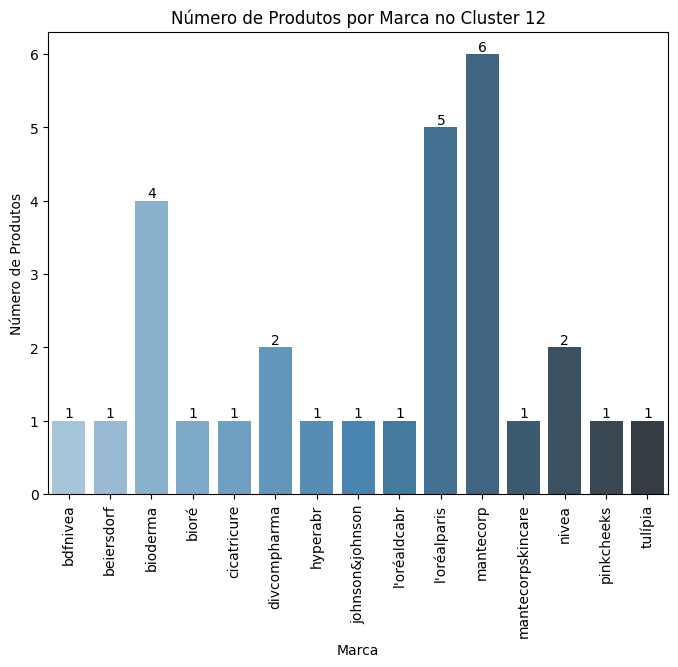

In [157]:
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=produtos_por_marca_df['prod-marca'], y=produtos_por_marca_df['qtd_produtos'], hue=produtos_por_marca_df['prod-marca'], palette='Blues_d')

# Adicionar rótulos nas barras
for i in barplot.containers:
    barplot.bar_label(i)

plt.title('Número de Produtos por Marca no Cluster 12')
plt.xlabel('Marca')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=90)

# Exibir o gráfico
plt.show()